# Introduction
Data analytics in weather involves the collection, processing, and interpretation of various types of data, such as atmospheric measurements, satellite imagery, weather station reports, historical weather data, and even crowd-sourced information from weather apps. These vast and diverse datasets are analyzed using advanced algorithms, statistical models, and machine learning techniques to uncover patterns, trends, and relationships that can aid in understanding and predicting weather phenomena.


### Step 1.Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


### Step 2.import the DataSet 

In [2]:
df=pd.read_csv('weather Data.csv')

### Step 3 . Data Understanding 

In [5]:
df.shape

(8784, 8)

In [6]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [7]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [14]:
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [15]:
#see the missing value 
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [25]:
#see only the unique values
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [26]:
#the unique values on all the data
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

### Step 4 . Data Preparation 

In [9]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [28]:
#changing the Date/Time column to datetime 
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [29]:
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

### Step 5. Find all the unique 'Wind speed' values in the data.

In [32]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

### Step 5 Find the number of time when the 'Weather is exactly clear'.

In [38]:
len(df[df['Weather']=='Clear'])
#df['Weather'].value_counts()
#df.query('Weather=="Clear"')

1326

### Step.6 Find the number of time when the 'Weather is exactly 4km/h'.

In [48]:
len(df[df['Wind Speed_km/h']==4])

474

### Step 7 Find out all the null values in the data.

In [60]:
df.isnull().sum() # no Null Value 

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### Step 8. Rename the column name 'Weather ' of the dataframe to 'Weather condition'.

In [64]:
df=df.rename(columns={'Weather':'Weather Condition'})

### Step.8 What is the mean 'visibility'?.

In [66]:
df['Visibility_km'].mean()

27.664446721311478

### Step.9 What is the standard deviation of 'Pressure ' in this data?


In [68]:
df['Press_kPa'].std()

0.8440047459486474

### Step.10 What is the variance of 'Relative Humidity ' in this data?

In [70]:
df['Rel Hum_%'].var()

286.2485501984998

### Step.11 Find all instances when 'Snow' was recorded.

In [73]:
df['Weather Condition'].value_counts() 

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [75]:
df[df['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


### Step.12 Find all instances when 'Wind speed is above 24' and 'Visibility'is 25 .

In [82]:
df[(df['Wind Speed_km/h']>24) & ( df['Visibility_km']==25)]\
.sort_values(by='Wind Speed_km/h',ascending=False)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
409,2012-01-18 01:00:00,3.7,-2.1,66,83,25.0,98.36,Mostly Cloudy
410,2012-01-18 02:00:00,0.5,-4.0,72,70,25.0,98.62,Mostly Cloudy
672,2012-01-29 00:00:00,1.5,-5.0,62,57,25.0,99.96,Mainly Clear
411,2012-01-18 03:00:00,-3.5,-8.2,70,57,25.0,99.00,Mostly Cloudy
1510,2012-03-03 22:00:00,2.8,-3.4,64,57,25.0,99.07,Snow
...,...,...,...,...,...,...,...,...
7870,2012-11-23 22:00:00,8.6,3.0,68,26,25.0,99.70,Rain Showers
2685,2012-04-21 21:00:00,2.6,0.3,85,26,25.0,101.06,Rain
3403,2012-05-21 19:00:00,25.4,12.8,46,26,25.0,101.05,Mostly Cloudy
3669,2012-06-01 21:00:00,19.6,5.7,40,26,25.0,100.80,Rain


### Q.13 What is the mean value of each column against each 'Weather condition'?

In [85]:
weather_mean=df.groupby('Weather Condition').mean()

C:\Users\zakaria\AppData\Local\Temp\ipykernel_15840\1047261643.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_mean=df.groupby('Weather Condition').mean()


### Q.14 What is minimum and maximum value of each column against each 'Weather condition'

In [88]:
df.groupby('Weather Condition').agg(['min', 'max'])

Date/Time  \
                                                        min   
Weather Condition                                             
Clear                                   2012-01-03 19:00:00   
Cloudy                                  2012-01-01 17:00:00   
Drizzle                                 2012-01-23 21:00:00   
Drizzle,Fog                             2012-01-23 20:00:00   
Drizzle,Ice Pellets,Fog                 2012-12-17 09:00:00   
Drizzle,Snow                            2012-12-17 15:00:00   
Drizzle,Snow,Fog                        2012-12-18 21:00:00   
Fog                                     2012-01-01 00:00:00   
Freezing Drizzle                        2012-01-07 11:00:00   
Freezing Drizzle,Fog                    2012-01-01 02:00:00   
Freezing Drizzle,Haze                   2012-02-01 11:00:00   
Freezing Drizzle,Snow                   2012-01-13 03:00:00   
Freezing Fog                            2012-01-22 06:00:00   
Freezing Rain                           2012-01-07 10:00:00   
Freezing Rain,Fog                       2012-01-07 09:00:00   
Freezing Rain,Haze                      2012-02-01 14:00:00   
Freezing Rain,Ice Pellets,Fog           2012-12-17 03:00:00   
Freezing Rain,Snow Grains               2012-01-13 09:00:00   
Haze                                    2012-01-22 12:00:00   
Mainly Clear                            2012-01-02 12:00:00   
Moderate Rain,Fog                       2012-12-10 08:00:00   
Moderate Snow                           2012-01-12 15:00:00   
Moderate Snow,Blowing Snow              2012-12-27 10:00:00   
Mostly Cloudy                           2012-01-01 16:00:00   
Rain                                    2012-01-01 18:00:00   
Rain Showers                            2012-01-01 22:00:00   
Rain Showers,Fog                        2012-10-20 03:00:00   
Rain Showers,Snow Showers               2012-11-04 08:00:00   
Rain,Fog                                2012-01-23 18:00:00   
Rain,Haze                               2012-03-13 07:00:00   
Rain,Ice Pellets                        2012-12-18 05:00:00   
Rain,Snow                               2012-01-10 05:00:00   
Rain,Snow Grains                        2012-12-21 00:00:00   
Rain,Snow,Fog                           2012-12-08 21:00:00   
Rain,Snow,Ice Pellets                   2012-12-21 01:00:00   
Snow                                    2012-01-03 07:00:00   
Snow Pellets                            2012-11-24 15:00:00   
Snow Showers                            2012-01-02 17:00:00   
Snow Showers,Fog                        2012-12-26 09:00:00   
Snow,Blowing Snow                       2012-01-13 21:00:00   
Snow,Fog                                2012-02-10 23:00:00   
Snow,Haze                               2012-02-01 17:00:00   
Snow,Ice Pellets                        2012-03-03 04:00:00   
Thunderstorms                           2012-07-04 16:00:00   
Thunderstorms,Heavy Rain Showers        2012-05-29 06:00:00   
Thunderstorms,Moderate Rain Showers,Fog 2012-07-17 06:00:00   
Thunderstorms,Rain                      2012-05-25 20:00:00   
Thunderstorms,Rain Showers              2012-05-29 04:00:00   
Thunderstorms,Rain Showers,Fog          2012-06-29 03:00:00   
Thunderstorms,Rain,Fog                  2012-07-17 05:00:00   

                                                            Temp_C        \
                                                        max    min   max   
Weather Condition                                                          
Clear                                   2012-12-30 20:00:00  -23.3  32.8   
Cloudy                                  2012-12-31 06:00:00  -21.4  30.5   
Drizzle                                 2012-12-22 01:00:00    1.1  18.8   
Drizzle,Fog                             2012-12-19 10:00:00    0.0  19.9   
Drizzle,Ice Pellets,Fog                 2012-12-17 09:00:00    0.4   0.4   
Drizzle,Snow                            2012-12-19 18:00:00    0.9   1.2   
Drizzle,Snow,Fog          

### Step.15 Show All the records where weather condition is Fog.


In [95]:
df[df['Weather Condition'].str.contains('Fog')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8739,2012-12-30 03:00:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog"
8740,2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog"
8741,2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog"
8742,2012-12-30 06:00:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog"


### Step.16 Find all instances when 'Weather is clear' or 'Visibility is above 40'.

In [101]:
df[(df['Weather Condition']=='Clear')&(df['Visibility_km']>40)]\
.sort_values(by='Visibility_km',ascending=False)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
351,2012-01-15 15:00:00,-15.4,-22.8,53,24,48.3,102.71,Clear
4613,2012-07-11 05:00:00,13.1,8.7,75,4,48.3,101.66,Clear
4674,2012-07-13 18:00:00,30.9,14.5,37,13,48.3,101.33,Clear
4672,2012-07-13 16:00:00,31.6,11.8,30,22,48.3,101.40,Clear
4671,2012-07-13 15:00:00,31.9,12.3,30,22,48.3,101.46,Clear
...,...,...,...,...,...,...,...,...
2597,2012-04-18 05:00:00,-1.0,-7.0,64,11,48.3,102.34,Clear
2478,2012-04-13 06:00:00,1.8,-3.4,68,6,48.3,101.67,Clear
2477,2012-04-13 05:00:00,1.3,-4.1,67,6,48.3,101.60,Clear
2317,2012-04-06 13:00:00,7.6,-7.7,33,15,48.3,101.18,Clear


### Step 17.Comparing Multiple Feature

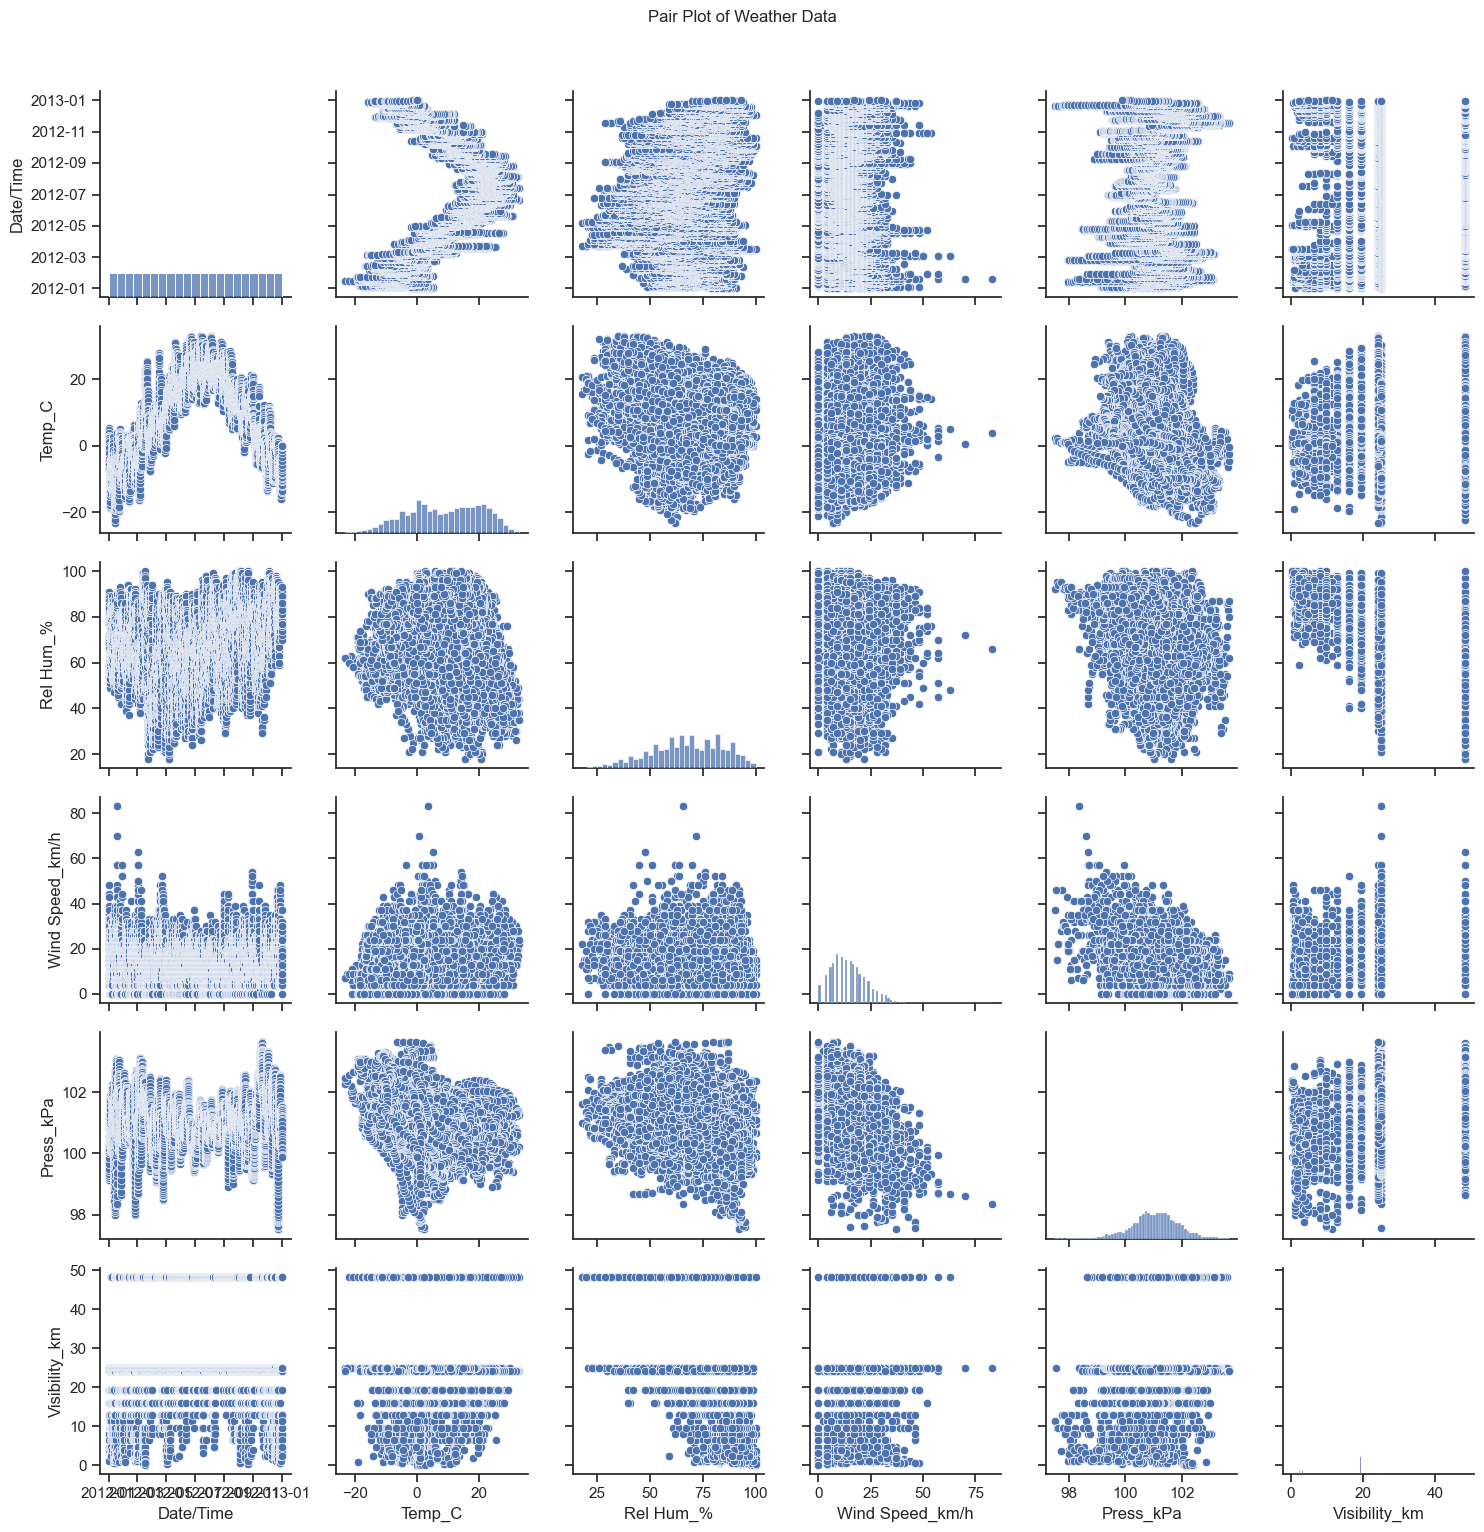

In [106]:
import seaborn as sns
sns.set(style='ticks')
sns.pairplot(df,vars=['Date/Time','Temp_C','Rel Hum_%','Wind Speed_km/h','Press_kPa','Visibility_km']
             )
plt.suptitle('Pair Plot of Weather Data', fontsize=12, y=1.02)  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility (optional)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()